<a href="https://colab.research.google.com/github/kvraagul/Machine_Learning/blob/main/Medical_Cost_Personal_Datasets_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [42]:
insurance_dataset = pd.read_csv('/content/Medical Cost Personal Datasets.zip')

In [43]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [44]:
insurance_dataset.shape

(1338, 7)

In [45]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [46]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [47]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [48]:
sns.set()

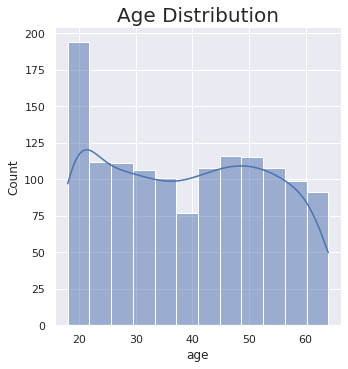

In [49]:
sns.displot(data=insurance_dataset,x='age',kde=True)
plt.title('Age Distribution',fontsize=20)
plt.show()

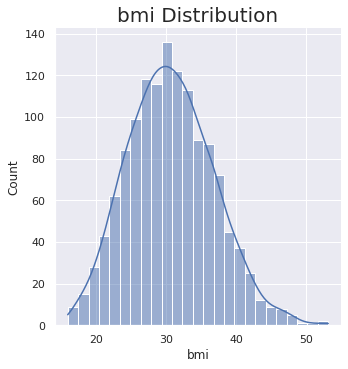

In [50]:
sns.displot(data=insurance_dataset,x='bmi',kde=True)
plt.title('bmi Distribution',fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


male      676
female    662
Name: sex, dtype: int64

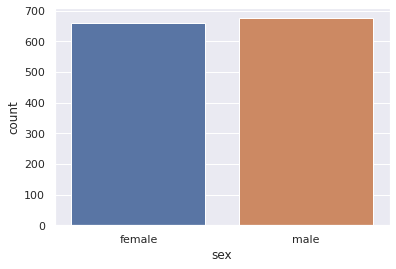

In [51]:
sns.countplot(insurance_dataset['sex'])
insurance_dataset['sex'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

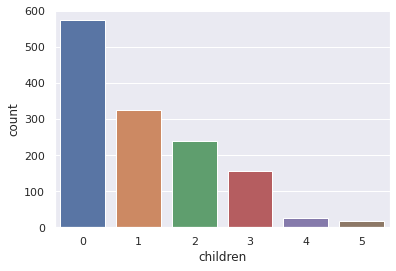

In [52]:
sns.countplot(insurance_dataset['children'])
insurance_dataset['children'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

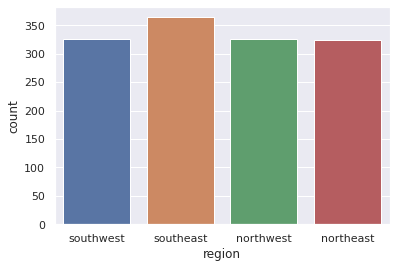

In [53]:
sns.countplot(insurance_dataset['region'])
insurance_dataset['region'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


no     1064
yes     274
Name: smoker, dtype: int64

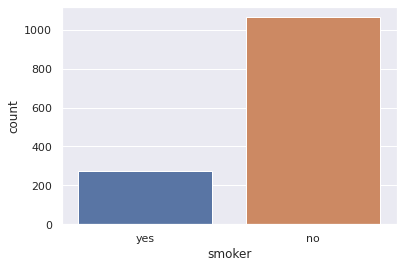

In [54]:
sns.countplot(insurance_dataset['smoker'])
insurance_dataset['smoker'].value_counts()

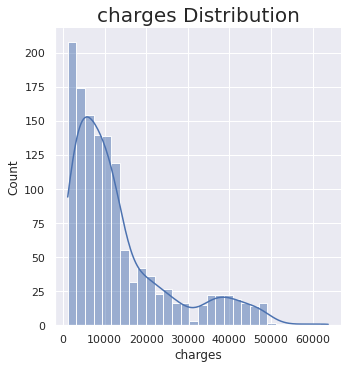

In [55]:
sns.displot(data=insurance_dataset,x='charges',kde=True)
plt.title('charges Distribution',fontsize=20)
plt.show()

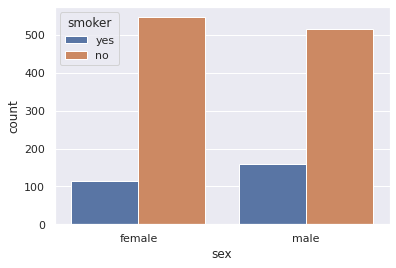

In [56]:
sns.countplot(data=insurance_dataset,x='sex',hue='smoker')

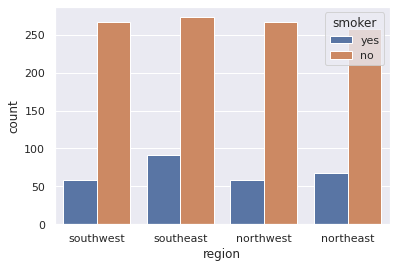

In [57]:
sns.countplot(data=insurance_dataset,x='region',hue='smoker')

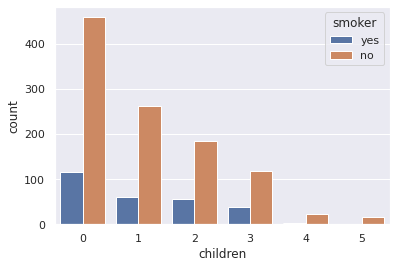

In [58]:
sns.countplot(data=insurance_dataset,x='children',hue='smoker')

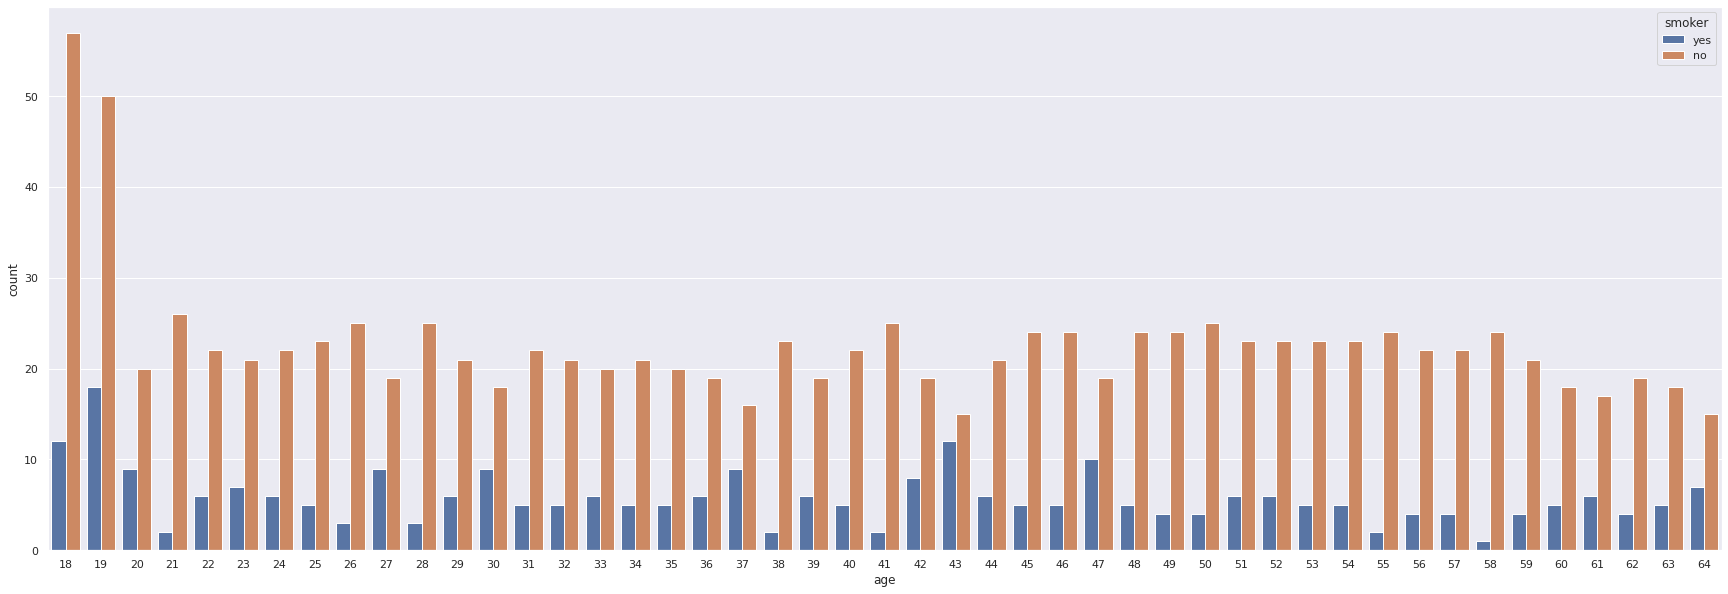

In [59]:
plt.figure(figsize=(30,10))
sns.countplot(data=insurance_dataset,x='age',hue='smoker')

In [61]:
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
insurance_dataset.replace({'smoker':{'no':0,'yes':1}},inplace=True)
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [62]:
insurance_dataset.sample(5)

,age,sex,bmi,children,smoker,region,charges
1143,39,0,32.340,2,0,0,6338.07560
134,20,1,28.785,0,0,2,2457.21115
964,52,0,36.765,2,0,3,26467.09737
912,59,1,26.695,3,0,3,14382.70905
876,49,1,27.100,1,0,1,26140.36030


In [64]:
X = insurance_dataset.drop(columns='charges',axis=1)
y = insurance_dataset['charges']

In [65]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [66]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [69]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [73]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
train_data_pred = model.predict(X_train)
r2_train = metrics.r2_score(y_train,train_data_pred)
print(f'r2 value for training data is {r2_train}')

r2 value for training data is 0.751505643411174


In [79]:
test_data_pred = model.predict(X_test)
r2_test = metrics.r2_score(y_test,test_data_pred)
print(f'r2 score for test data is {r2_test}')

r2 score for test data is 0.7447273869684077


In [86]:
insurance_dataset.sample()

,age,sex,bmi,children,smoker,region,charges
1130,39,1,23.87,5,0,0,8582.3023


In [87]:
input_data = (40,0,23.30,3,0,3)
input_data = np.asarray(input_data).reshape(1,-1)

In [91]:
predictor = model.predict(input_data)
print(f'The insurance cost is {predictor[0]} USD ')

The insurance cost is 7567.322798573772 USD 
